In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE


In [3]:
df= pd.read_csv('loan_approval_dataset.csv')
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


#### Data cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [6]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [7]:
print ("Number of columns = ",df.shape[1])
print ("Number of rows    = ",df.shape[0])

Number of columns =  13
Number of rows    =  4269


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
for col in df:
    print(col, " -> ",df[col].unique())

loan_id  ->  [   1    2    3 ... 4267 4268 4269]
 no_of_dependents  ->  [2 0 3 5 4 1]
 education  ->  [' Graduate' ' Not Graduate']
 self_employed  ->  [' No' ' Yes']
 income_annum  ->  [9600000 4100000 9100000 8200000 9800000 4800000 8700000 5700000  800000
 1100000 2900000 6700000 5000000 1900000 4700000  500000 2700000 6300000
 5800000 6500000 4900000 3100000 2400000 7000000 9000000 8400000 1700000
 1600000 8000000 3600000 1500000 7800000 1400000 4200000 5500000 9500000
 7300000 3800000 5100000 4300000 9300000 7400000 8500000 8800000 3300000
 3900000 8300000 5600000 5300000 2600000  700000 3500000 9900000 3000000
 6800000 2000000 1000000  300000 6600000 9400000 4400000  400000 6200000
 9700000 7100000  600000 7200000  900000  200000 1800000 4600000 2200000
 2500000 8600000 4000000 5200000 8900000 1300000 4500000 8100000 9200000
 2800000 7500000 6400000 6900000 7700000 3200000 7900000 5900000 3400000
 2100000 3700000 5400000 2300000 7600000 6000000 6100000 1200000]
 loan_amount  ->  

In [10]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [11]:
outliers_number={}
numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    lower = q1 - 1.5 * IQR
    upper = q3 + 1.5 * IQR
    outlier = df[(df[col] < lower) | (df[col] > upper)]
    outliers_number[col] = outlier.shape[0]

print(outliers_number)

{'loan_id': 0, ' no_of_dependents': 0, ' income_annum': 0, ' loan_amount': 0, ' loan_term': 0, ' cibil_score': 0, ' residential_assets_value': 52, ' commercial_assets_value': 37, ' luxury_assets_value': 0, ' bank_asset_value': 5}


## Data Visualization (EDA)

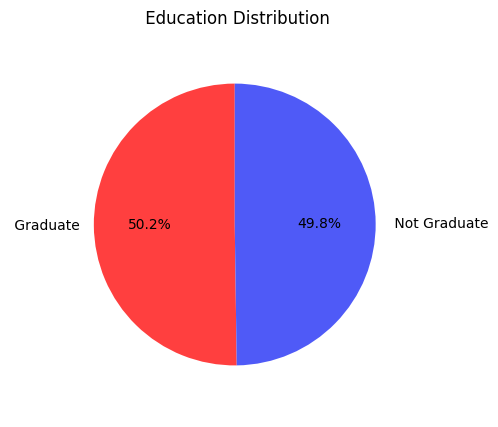

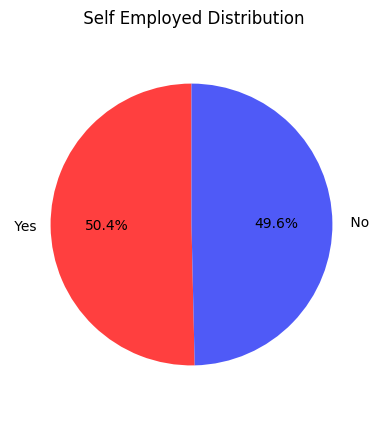

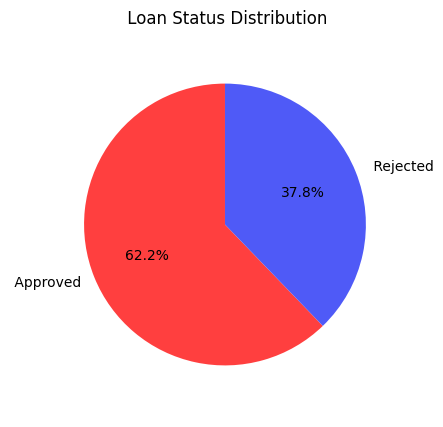

In [12]:
for col in df.columns:
    if df[col].nunique() == 2:
        # Count the values
        value_counts = df[col].value_counts()
        
        # Clean column name for title
        col_title = col.replace('_', ' ').title()
        
        # Plot pie chart
        plt.figure(figsize=(4, 5))
        plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=["#FF3F3F","#4F5AF7"])
        plt.title(f"{col_title} Distribution")
        plt.axis('equal')  # Equal aspect ratio ensures pie is circular
        plt.show()

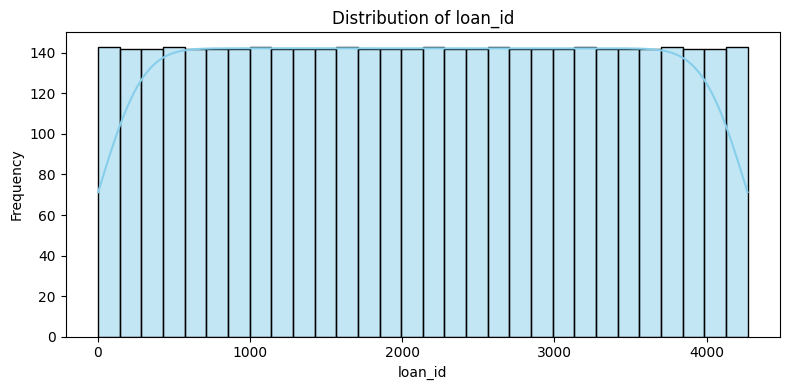

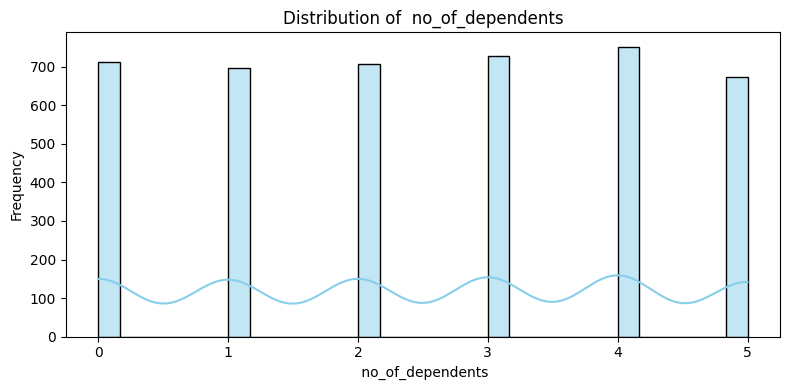

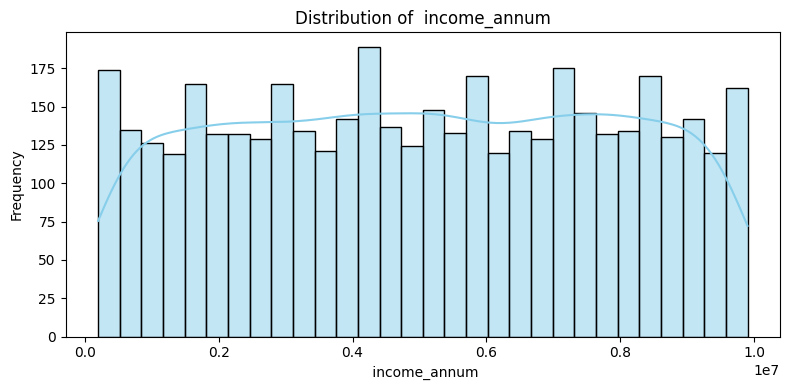

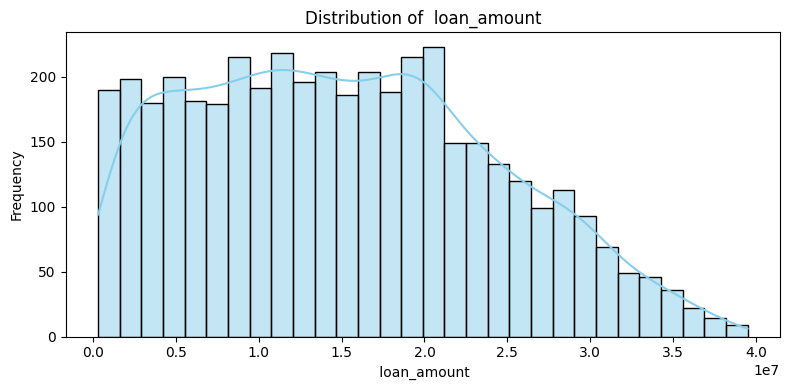

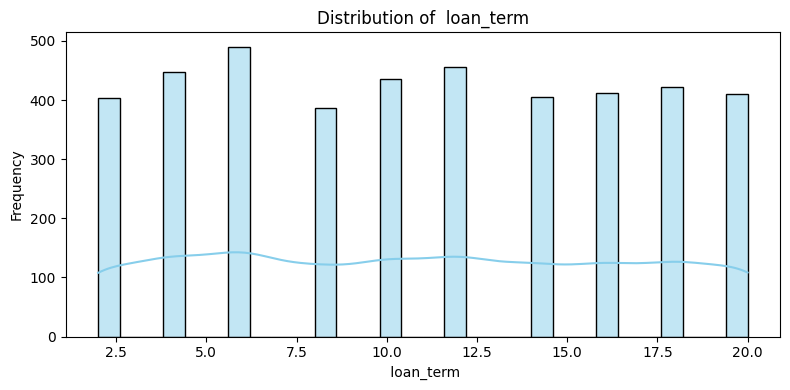

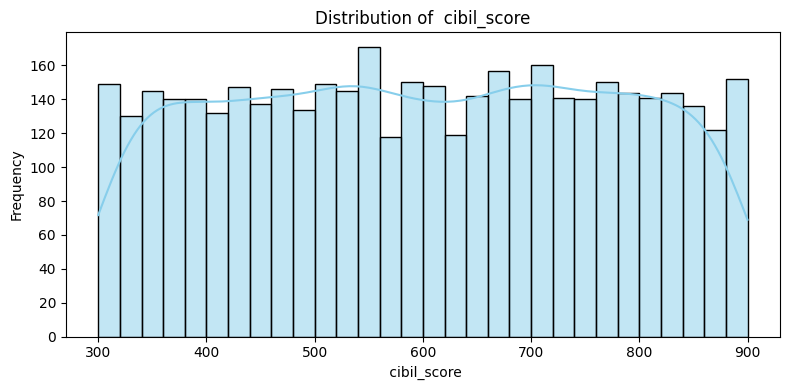

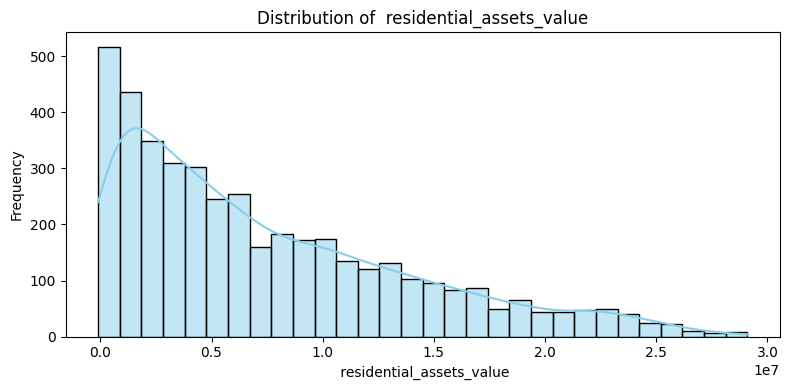

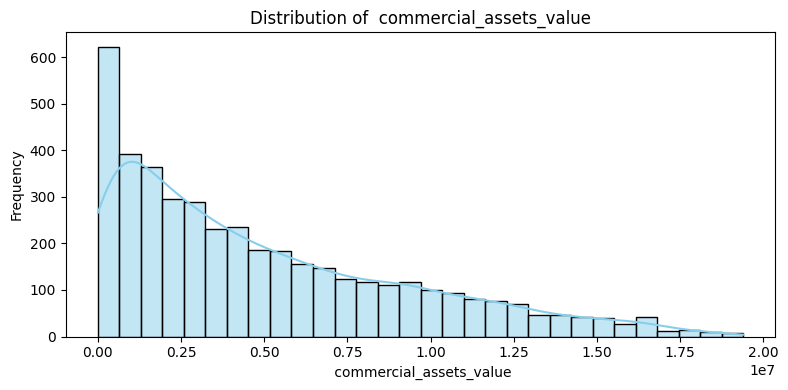

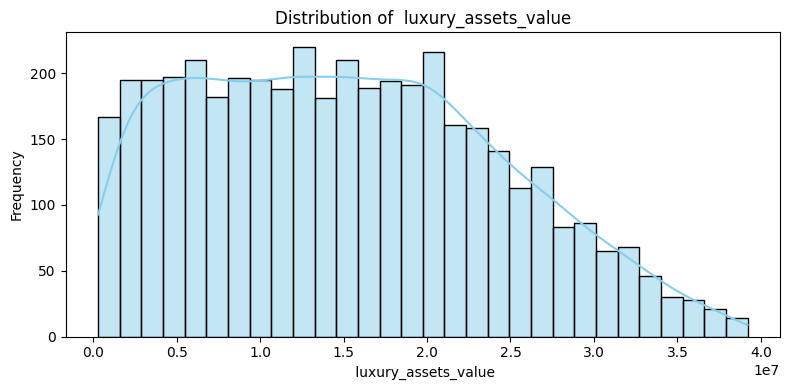

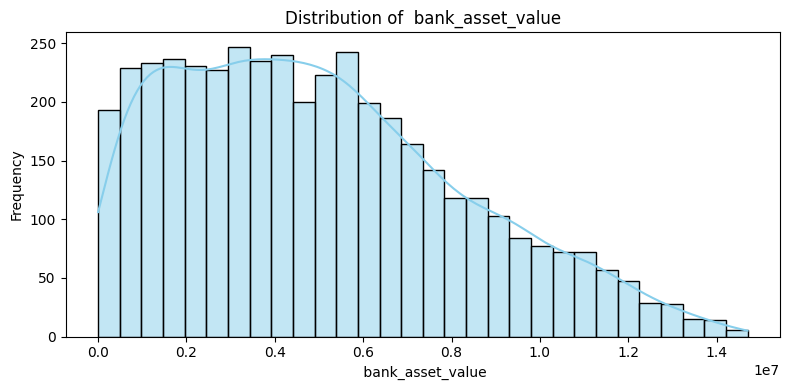

In [13]:
for col in df.columns:
    if df[col].nunique() > 2:
        plt.figure(figsize=(8, 4))

        # For numeric columns, we use histogram (distribution)
        if pd.api.types.is_numeric_dtype(df[col]):
            sns.histplot(df[col], kde=True, bins=30, color='skyblue')
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')

        # For categorical columns, we use countplot
        else:
            sns.countplot(x=df[col], order=df[col].value_counts().index, palette='viridis')
            plt.title(f'Category Counts of {col}')
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()

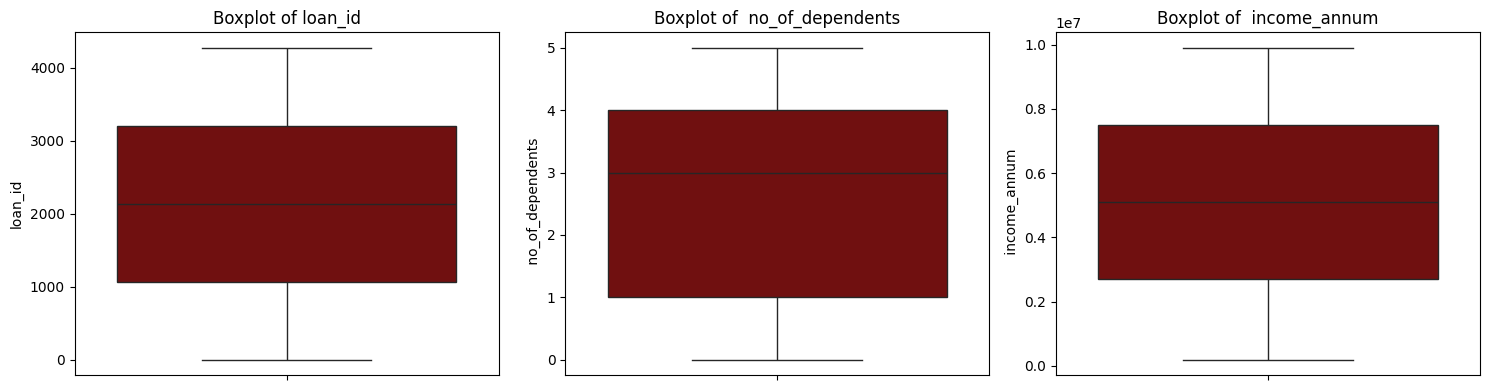

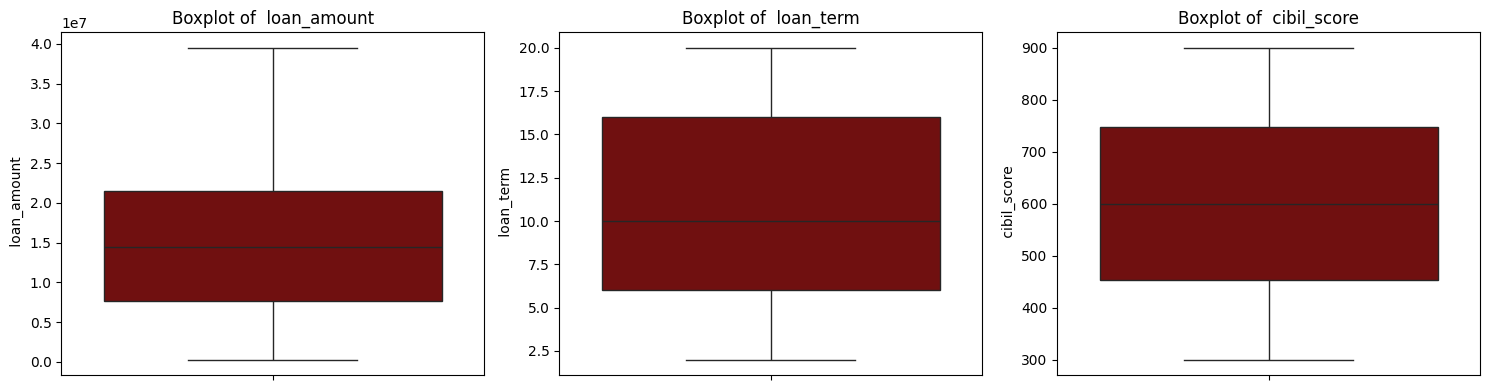

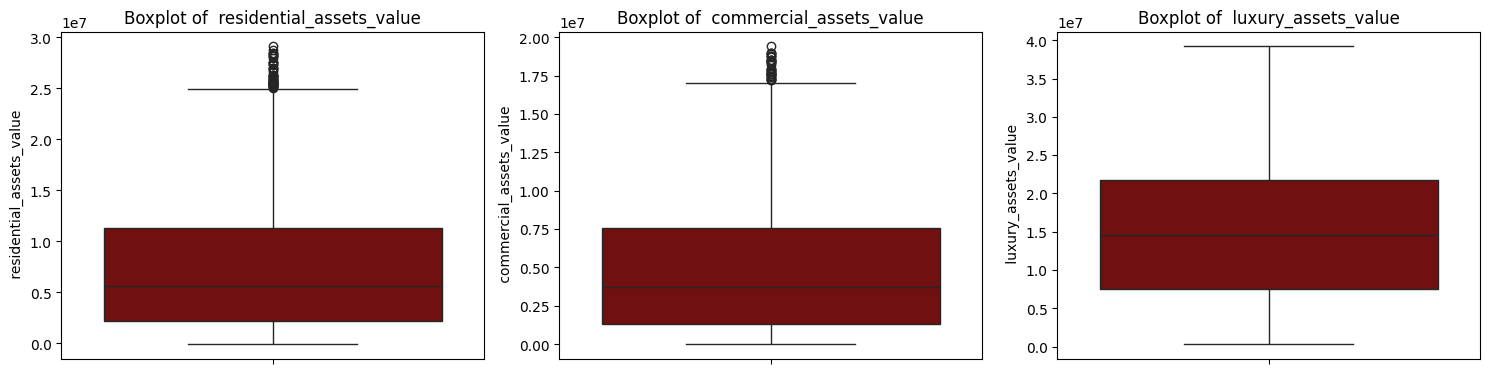

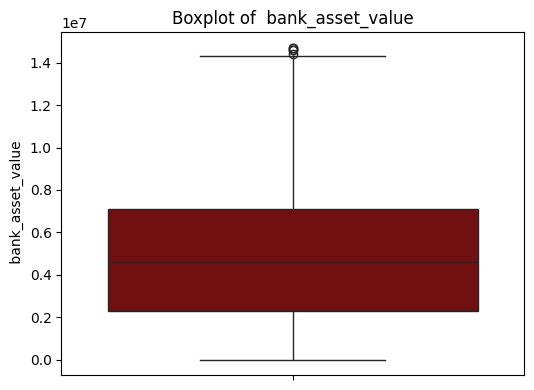

In [14]:
non_binary_numeric_cols = [
    col for col in df.select_dtypes(include='number').columns 
    if df[col].nunique() > 2
]

# Plot boxplots in batches of 3 per row
for i in range(0, len(non_binary_numeric_cols), 3):
    cols = non_binary_numeric_cols[i:i+3]
    plt.figure(figsize=(15, 4))

    for j, col in enumerate(cols):
        plt.subplot(1, 3, j + 1)
        sns.boxplot(data=df, y=col, color='maroon')
        plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()

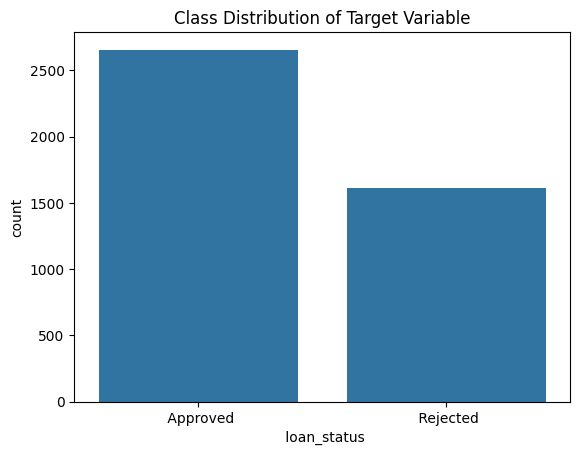

In [15]:
sns.countplot(x=df[' loan_status'])
plt.title("Class Distribution of Target Variable")
plt.show()

## Dealing with Outliers

In [16]:
def cap_outliers_iqr(df, exclude_col=None):
    for col in df.select_dtypes(include='number').columns:
        if exclude_col and col == exclude_col:
            continue
        if df[col].nunique() <= 2:
            continue  # Skip binary or near-constant columns

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        df[col] = df[col].clip(lower, upper)

In [17]:
outliers_number={}
numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    lower = q1 - 1.5 * IQR
    upper = q3 + 1.5 * IQR
    outlier = df[(df[col] < lower) | (df[col] > upper)]
    outliers_number[col] = outlier.shape[0]

print(outliers_number)

{'loan_id': 0, ' no_of_dependents': 0, ' income_annum': 0, ' loan_amount': 0, ' loan_term': 0, ' cibil_score': 0, ' residential_assets_value': 52, ' commercial_assets_value': 37, ' luxury_assets_value': 0, ' bank_asset_value': 5}


In [18]:
print(df.columns.tolist())


['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']


In [19]:
df.columns = df.columns.str.strip()

# One-hot encode the specified columns
df = pd.get_dummies(df, columns=['education', 'self_employed'], prefix=['edu', 'self'], drop_first=False)

# Now df_encoded includes binary columns for each category in 'education' and 'self_employed'
print(df.head())


   loan_id  no_of_dependents  income_annum  loan_amount  loan_term  \
0        1                 2       9600000     29900000         12   
1        2                 0       4100000     12200000          8   
2        3                 3       9100000     29700000         20   
3        4                 3       8200000     30700000          8   
4        5                 5       9800000     24200000         20   

   cibil_score  residential_assets_value  commercial_assets_value  \
0          778                   2400000                 17600000   
1          417                   2700000                  2200000   
2          506                   7100000                  4500000   
3          467                  18200000                  3300000   
4          382                  12400000                  8200000   

   luxury_assets_value  bank_asset_value loan_status  edu_ Graduate  \
0             22700000           8000000    Approved           True   
1              8800000

In [20]:
df

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,edu_ Graduate,edu_ Not Graduate,self_ No,self_ Yes
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,True,False,True,False
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,False,True,False,True
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,True,False,True,False
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,True,False,True,False
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected,True,False,False,True
4265,4266,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved,False,True,False,True
4266,4267,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected,False,True,True,False
4267,4268,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved,False,True,True,False


In [23]:
cols = ['edu_ Graduate', 'edu_ Not Graduate', 'self_ No', 'self_ Yes']

df.columns = df.columns.str.strip()
cols = [col.strip() for col in cols]

for col in cols:
    df[col] = df[col].map({True: 1, False: 0})

df


,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,edu_ Graduate,edu_ Not Graduate,self_ No,self_ Yes
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,1,0,1,0
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,0,1,0,1
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,1,0,1,0
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,1,0,1,0
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected,1,0,0,1
4265,4266,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved,0,1,0,1
4266,4267,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected,0,1,1,0
4267,4268,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved,0,1,1,0


In [24]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,edu_ Graduate,edu_ Not Graduate,self_ No,self_ Yes
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4269.000000,4269.000000
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,0.502225,0.497775,0.496369,0.503631
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,0.500054,0.500054,0.500045,0.500045
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,0.000000,0.000000,0.000000,0.000000
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,1.000000,0.000000,0.000000,1.000000
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,1.000000,1.000000,1.000000,1.000000
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07,1.000000,1.000000,1.000000,1.000000


## Standardization

In [26]:
numerical_cols = [
    'no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
    'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'
]

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [27]:
df

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,edu_ Graduate,edu_ Not Graduate,self_ No,self_ Yes
0,1,-0.294102,1.617979,1.633052,0.192617,1.032792,-0.780058,2.877289,0.832028,0.930304,Approved,1,0,1,0
1,2,-1.473548,-0.341750,-0.324414,-0.508091,-1.061051,-0.733924,-0.631921,-0.694993,-0.515936,Rejected,0,1,0,1
2,3,0.295621,1.439822,1.610933,1.594031,-0.544840,-0.057300,-0.107818,1.996520,2.407316,Rejected,1,0,1,0
3,4,0.295621,1.119139,1.721525,-0.508091,-0.771045,1.649637,-0.381263,0.897943,0.899533,Rejected,1,0,1,0
4,5,1.475067,1.689242,1.002681,1.594031,-1.264055,0.757724,0.735304,1.568075,0.007172,Rejected,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,1.475067,-1.446324,-1.419268,0.192617,-1.641063,-0.718546,-1.019301,-1.299210,-1.285213,Rejected,1,0,0,1
4265,4266,-1.473548,-0.626801,-0.423946,1.594031,-0.237434,-0.503257,-0.472412,-0.453306,-0.946732,Approved,0,1,0,1
4266,4267,-0.294102,0.513405,0.969504,1.243677,-0.829046,-0.964591,1.692361,0.326683,0.714907,Rejected,0,1,1,0
4267,4268,-0.883825,-0.341750,-0.258059,-0.508091,1.044393,0.111856,-0.973727,-0.112748,0.253341,Approved,0,1,1,0


## Splitting


In [ ]:
X = df.drop(columns=['loan_id', 'loan_status'])
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Check shapes
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(3415, 13) (854, 13)
(3415,) (854,)


## Train and Fit

In [35]:
model = DecisionTreeClassifier(max_depth=5,random_state=42)
model.fit(X_train, y_train)

# Predict on training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Compute accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.9757
Testing Accuracy: 0.9696


In [37]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, digits=4))

Confusion Matrix:
[[517  19]
 [  7 311]]

Classification Report:
              precision    recall  f1-score   support

    Approved     0.9866    0.9646    0.9755       536
    Rejected     0.9424    0.9780    0.9599       318

    accuracy                         0.9696       854
   macro avg     0.9645    0.9713    0.9677       854
weighted avg     0.9702    0.9696    0.9697       854



## Bonus


In [39]:
logreg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# 4. Predict
y_pred = logreg.predict(X_test)

# 5. Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test_pred, y_pred))

print("\nClassification Report:")
print(classification_report(y_test_pred, y_pred, digits=4))


Confusion Matrix:
[[483  41]
 [ 25 305]]

Classification Report:
              precision    recall  f1-score   support

    Approved     0.9508    0.9218    0.9360       524
    Rejected     0.8815    0.9242    0.9024       330

    accuracy                         0.9227       854
   macro avg     0.9161    0.9230    0.9192       854
weighted avg     0.9240    0.9227    0.9230       854



#### Logistic regression 92%
## vs
#### Decesion Tree 96%